# Keras
Librería para programar redes neuronales de una manera más sencilla que con TensorFlow. Keras se encuentra en una capa de abstracción por encima de TensorFlow.

[Documentación](https://keras.io/guides/)

In [ ]:
# !pip install tensorflow
# !pip install keras

Empezamos importando librerías

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np

Cargamos los datos de mnist. No vamos a tratar imagenes con redes convolucionales (perdemos la estructura espacial 2D). Todos los pixeles se convertirán en un vector de 28x28 features independientes, que serán las entradas del modelo.

In [49]:
# Cogemos las imágenes de los dígitos asi como el conjunto de train y test
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

Vemos dimensiones del dataset

In [50]:
'''
60.000 imagenes de 28x28 pixeles
'''
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [4]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

60.000 imágenes de 28x28 pixeles. Vamos a representar una de ellas

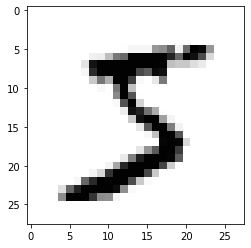

In [4]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap=plt.cm.get_cmap('Greys'));

Cada imagen se compone de 28x28 pixeles, y cada pixel representa una escala de grises que va del 0 al 255. Siendo 0 el blanco y 255 negro.

¿Se te ocurre alguna manera de normalizar los datos?

In [6]:
np.min(X_train)

0

In [6]:
0/255

0.0

In [9]:
128/255

0.5019607843137255

In [10]:
255/255

1.0

In [51]:
X_train = X_train.astype("float32")/255
X_test = X_test.astype("float32")/255

In [8]:
np.mean(X_train)

0.13066062

In [9]:
'''
Comprobamos la normalización
'''
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [52]:
y_train = y_train.astype("float32")
y_test = y_test.astype("float32")

Guardamos datos para validación. Estos datos se usarán durante el entrenamiento. Otra opción es decirle a keras en la etapa de entrenamiento que reserve un X % de los datos para validar.

In [53]:
X_val = X_train[-10000:]
y_val = y_train[-10000:]

X_train = X_train[:-10000]
y_train = y_train[:-10000]

In [54]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(50000, 28, 28)
(10000, 28, 28)
(10000, 28, 28)


Montamos la arquitectura de la red neuronal. Se va a componer de:
* **Sequential**: API para iniciar la red neuronal. No cuenta como capa.
* **Flatten**: capa de entrada. Necesita un vector unidimensional. Como tenemos imágenes, esta capa aplana las imagenes (2D) en 1D.
* **Dense**: es una hidden layer. Se compondrá de `n` neuronas y de una función de activación que se aplicará a todas las neuronas de la capa.

Recuerda que es un problema de clasificación multiclase (10 clases) y que por tanto la última capa se compondrá de tantas neuronas como clases tengas.

En cuanto a las funciones de activación es recomendable usar relu en las hidden layer, que tarda menos en entrenar, mientras que la ultima (output) suele ser una softmax.

In [14]:
28*28

784

In [15]:
model = keras.models.Sequential()

# Capa entrada
model.add(keras.layers.Flatten(input_shape=(28, 28)))

# Hidden layer
model.add(keras.layers.Dense(units = 300,
                            activation='relu'))

# Hidden layer
model.add(keras.layers.Dense(units = 100,
                            activation='relu'))

# Capa salida
model.add(keras.layers.Dense(units = 10,
                            activation='softmax'))

In [56]:
# Otra manera de declarar la red neuronal
capas = [
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(units = 300, activation='relu'),
    keras.layers.Dense(units = 100, activation='relu'),
    keras.layers.Dense(units = 10, activation='softmax')
]

model = keras.models.Sequential(capas)

Podemos ver las capas, y acceder a sus elementos

In [23]:
print(model.layers[0])

Podemos ver los pesos de las capas sin entrenar, porque los inicializa aleatoriamente. Los bias los inicializa a 0.

In [24]:
hidden1 = model.layers[1]
weights, biases = hidden1.get_weights()

In [25]:
weights

array([[-0.05010254, -0.01068587,  0.02828723, ..., -0.06792188,
        -0.01594454,  0.0611342 ],
       [ 0.00970887, -0.07249174, -0.02669676, ..., -0.00335648,
        -0.0274398 ,  0.04416718],
       [ 0.07255368,  0.06485075,  0.06431442, ...,  0.00198733,
        -0.05851821,  0.04748998],
       ...,
       [-0.03390225,  0.02782699,  0.0020127 , ...,  0.02175307,
         0.00393757,  0.04037397],
       [ 0.04120754,  0.01092095, -0.03232834, ...,  0.018186  ,
        -0.03287358, -0.00296648],
       [-0.00423901,  0.05735701,  0.05292946, ..., -0.06527325,
        -0.04234347,  0.06331092]], dtype=float32)

In [31]:
len(weights)

784

In [32]:
len(weights[0])

300

In [33]:
28*28

784

In [34]:
300*784

235200

In [35]:
weights.size

235200

In [36]:
len(biases)

300

Establecemos la configuración de ejecución... el compile.

In [57]:
model.compile(
    optimizer = keras.optimizers.SGD(),
    loss = keras.losses.SparseCategoricalCrossentropy(),
    metrics = [keras.metrics.SparseCategoricalAccuracy()]
)

In [58]:
# Equivalente
model.compile(
    optimizer = "sgd",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

In [40]:
# Summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [43]:
784 * 300 + 300

235500

In [43]:
# 1º neurona de la 1º hidden layer
# y = a + w1*x1 + w2*x2 + .... wn*xn
# a es el intercepto llamado bias
# wn es cada uno de los pesos que va a ir actualizando con el backpropagation
# n es 784
# En la 1º hidden layer tenemos 784 pesos por cada neurona, al tener 300, tenemos un total de:
print(784*300 + 300)

235500


In [38]:
300 * 784 + 300

235500

In [39]:
300 * 100 + 100

30100

In [41]:
100 * 10 + 10

1010

Entrenamos el modelo. Usamos los datos de entrenamiento. El batch_size es la cantidad de muestras que utiliza el SGD, y las epochs son las iteraciones que realiza en el entrenamiento.

In [44]:
X_train.shape

(40000, 28, 28)

In [46]:
50000/128

390.625

In [59]:
history = model.fit(
    X_train,
    y_train,
    batch_size = 128,
    epochs = 50,
    validation_data = (X_val, y_val) # validation_split = 0.1
)

Epoch 1/50
391/391 [==============================] - 2s 4ms/step - loss: 1.2883 - accuracy: 0.6843 - val_loss: 0.6085 - val_accuracy: 0.8626
Epoch 2/50
391/391 [==============================] - 1s 3ms/step - loss: 0.5199 - accuracy: 0.8694 - val_loss: 0.3933 - val_accuracy: 0.8995
Epoch 3/50
391/391 [==============================] - 2s 5ms/step - loss: 0.3992 - accuracy: 0.8917 - val_loss: 0.3323 - val_accuracy: 0.9101
Epoch 4/50
391/391 [==============================] - 2s 5ms/step - loss: 0.3512 - accuracy: 0.9034 - val_loss: 0.3026 - val_accuracy: 0.9172
Epoch 5/50
391/391 [==============================] - 2s 5ms/step - loss: 0.3224 - accuracy: 0.9094 - val_loss: 0.2833 - val_accuracy: 0.9209
Epoch 6/50
391/391 [==============================] - 2s 5ms/step - loss: 0.3015 - accuracy: 0.9154 - val_loss: 0.2668 - val_accuracy: 0.9247
Epoch 7/50
391/391 [==============================] - 2s 5ms/step - loss: 0.2849 - accuracy: 0.9199 - val_loss: 0.2553 - val_accuracy: 0.9280
Epoch 

Podemos reentrenar el modelo. No empieza de nuevo, sino que retoma el entrenamiento anterior.

In [60]:
model.fit(
    X_train,
    y_train,
    batch_size = 64,
    epochs = 10,
    validation_data = (X_val, y_val) # validation_split = 0.1
)

Epoch 1/10
782/782 [==============================] - 2s 3ms/step - loss: 0.0844 - accuracy: 0.9768 - val_loss: 0.1050 - val_accuracy: 0.9705
Epoch 2/10
782/782 [==============================] - 2s 3ms/step - loss: 0.0815 - accuracy: 0.9773 - val_loss: 0.1018 - val_accuracy: 0.9720
Epoch 3/10
782/782 [==============================] - 2s 3ms/step - loss: 0.0785 - accuracy: 0.9785 - val_loss: 0.0990 - val_accuracy: 0.9727
Epoch 4/10
782/782 [==============================] - 2s 2ms/step - loss: 0.0755 - accuracy: 0.9794 - val_loss: 0.0972 - val_accuracy: 0.9729
Epoch 5/10
782/782 [==============================] - 2s 3ms/step - loss: 0.0728 - accuracy: 0.9806 - val_loss: 0.0971 - val_accuracy: 0.9726
Epoch 6/10
782/782 [==============================] - 2s 3ms/step - loss: 0.0703 - accuracy: 0.9812 - val_loss: 0.0940 - val_accuracy: 0.9739
Epoch 7/10
782/782 [==============================] - 2s 3ms/step - loss: 0.0677 - accuracy: 0.9818 - val_loss: 0.0949 - val_accuracy: 0.9739
Epoch 

Veamos el histórico del entrenamiento, para poder representarlo posteriormente.

In [61]:
# print(history.params)
# print(history.epoch)
print(history.history)

{'loss': [1.2883081436157227, 0.5198684930801392, 0.3992367684841156, 0.35116276144981384, 0.3224305212497711, 0.3014552593231201, 0.28485628962516785, 0.27063828706741333, 0.2583021819591522, 0.24726399779319763, 0.23700830340385437, 0.22793470323085785, 0.2197207659482956, 0.21146424114704132, 0.2044181078672409, 0.19770146906375885, 0.19108964502811432, 0.18497119843959808, 0.17924843728542328, 0.17353783547878265, 0.16847240924835205, 0.16364341974258423, 0.1590096354484558, 0.1546274572610855, 0.15043166279792786, 0.14639559388160706, 0.14261242747306824, 0.13869883120059967, 0.13531002402305603, 0.13184814155101776, 0.12866666913032532, 0.12566743791103363, 0.12262481451034546, 0.11962064355611801, 0.11697051674127579, 0.11442211270332336, 0.11166426539421082, 0.10916461795568466, 0.10697532445192337, 0.10456623882055283, 0.10240914672613144, 0.10010309517383575, 0.09806167334318161, 0.0959843099117279, 0.09403691440820694, 0.09223857522010803, 0.09036707133054733, 0.088610433042

In [62]:
history.history

{'loss': [1.2883081436157227,
  0.5198684930801392,
  0.3992367684841156,
  0.35116276144981384,
  0.3224305212497711,
  0.3014552593231201,
  0.28485628962516785,
  0.27063828706741333,
  0.2583021819591522,
  0.24726399779319763,
  0.23700830340385437,
  0.22793470323085785,
  0.2197207659482956,
  0.21146424114704132,
  0.2044181078672409,
  0.19770146906375885,
  0.19108964502811432,
  0.18497119843959808,
  0.17924843728542328,
  0.17353783547878265,
  0.16847240924835205,
  0.16364341974258423,
  0.1590096354484558,
  0.1546274572610855,
  0.15043166279792786,
  0.14639559388160706,
  0.14261242747306824,
  0.13869883120059967,
  0.13531002402305603,
  0.13184814155101776,
  0.12866666913032532,
  0.12566743791103363,
  0.12262481451034546,
  0.11962064355611801,
  0.11697051674127579,
  0.11442211270332336,
  0.11166426539421082,
  0.10916461795568466,
  0.10697532445192337,
  0.10456623882055283,
  0.10240914672613144,
  0.10010309517383575,
  0.09806167334318161,
  0.095984309

In [63]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [64]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,1.288308,0.68434,0.608498,0.8626
1,0.519868,0.86940,0.393318,0.8995
2,0.399237,0.89168,0.332290,0.9101
3,0.351163,0.90344,0.302568,0.9172
4,0.322431,0.90940,0.283337,0.9209
5,0.301455,0.91544,0.266799,0.9247
6,0.284856,0.91994,0.255297,0.9280
7,0.270638,0.92468,0.244445,0.9317
8,0.258302,0.92758,0.234849,0.9329
9,0.247264,0.93062,0.226034,0.9360


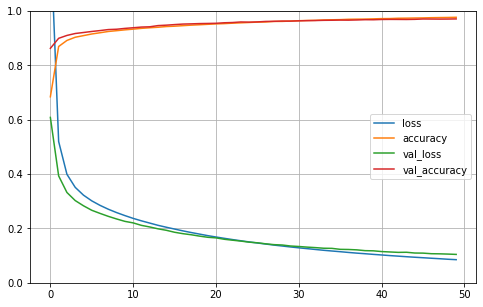

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

Si el modelo no ha ido bien, prueba a cambiar el learning rate, cambia de optimizador y después prueba a cambiar capas, neuronas y funciones de activación.

Ya tenemos el modelo entrenado. Probémoslo con test

In [66]:
results = model.evaluate(X_test, y_test)
results

313/313 [==============================] - 0s 1ms/step - loss: 0.0903 - accuracy: 0.9730: 0s - loss: 0.1232 - accura


[0.09027296304702759, 0.9729999899864197]

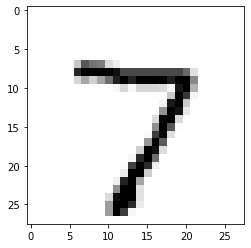

In [67]:
# Cogemos el primero
plt.imshow(X_test[0].reshape(28,28), cmap=plt.cm.get_cmap('Greys'));

In [68]:
X_test[:1]

array([[[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.

In [69]:
predictions = model.predict(X_test[:1])
print(predictions.shape)
predictions

(1, 10)


array([[5.6733916e-06, 2.9396406e-07, 1.8251505e-04, 1.5268563e-03,
        2.9056949e-07, 5.8489313e-06, 7.3265255e-10, 9.9824476e-01,
        1.6131806e-05, 1.7545648e-05]], dtype=float32)

In [72]:
predictions.argmax()

7

In [73]:
model.predict(X_test).argmax(axis=1)

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

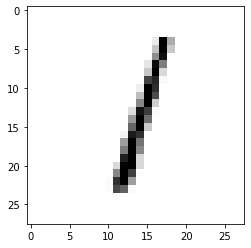

In [77]:
plt.imshow(X_test[2].reshape(28,28), cmap=plt.cm.get_cmap('Greys'));

### Problema de regresión
Veamos un ejemplo de cómo aplicar una red neuronal de TensorFlow a un problema de regresión.

In [78]:
# Cargamos datos
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns = housing.feature_names)
df['target'] = housing['target']
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Divimos en train, test y validation

In [79]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data,
                                                              housing.target)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full,
                                                      y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [80]:
X_train.shape

(11610, 8)

Montamos el modelo. Simplemente se compondrá de una hidden layer, a la que le configuramos una capa previa de entrada de 8 neuronas (las features).

Se trata de un modelo de regresión, por lo que la capa de salida es una única neurona.

In [81]:
11610/32

362.8125

In [82]:
X_train.shape[1:]

(8,)

In [83]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation = 'relu',
                      input_shape = X_train.shape[1:]),
    keras.layers.Dense(1)
])

model.compile(loss = "mean_squared_error",
             optimizer = "sgd")

history = model.fit(X_train,
                   y_train,
                   epochs = 20,
                   validation_data = (X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 0.8455 - val_loss: 0.5260
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.8631 - val_loss: 0.4763
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4831 - val_loss: 0.4512
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4633 - val_loss: 0.4374
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4567 - val_loss: 0.4327
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4454 - val_loss: 0.4208
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4488 - val_loss: 0.4219
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4443 - val_loss: 0.4189
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4265 - val_loss: 0.4082
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4204 - val_loss: 0.4022

In [85]:
8*30 + 30

270

In [84]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 30)                270       
                                                                 
 dense_10 (Dense)            (None, 1)                 31        
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [86]:
mse_test = model.evaluate(X_test, y_test)
print(mse_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.3747
0.3746512234210968


In [87]:
y_pred = model.predict(X_test[:5])
y_pred

array([[1.8314105],
       [1.8468995],
       [1.4810897],
       [2.6112893],
       [1.9384623]], dtype=float32)

### Guardar modelo
Para guardar el modelo, en el formato de Keras (HDF5). 

In [88]:
model.save("my_keras_model.h5")

In [89]:
# Lo volvemos a cargar
model = keras.models.load_model("my_keras_model.h5")

### Callbacks
Son funciones predefinidas de Keras a aplicar durante el entrenamiento
Por ejemplo, `ModelCheckpoint` sirve para que el modelo se vaya guardando tras cada epoch. Así no perdemos el progreso en caso de que decidamos interrumpir el entrenamiento. El callback recibe como argumento el nombre del objeto donde queremos que se guarde el modelo entrenado.

In [90]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("callback_model.h5")
history = model.fit(X_train,
                   y_train,
                   epochs=30,
                   callbacks = [checkpoint_cb])

Epoch 1/30
363/363 [==============================] - 1s 1ms/step - loss: 0.3915
Epoch 2/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3951
Epoch 3/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3894
Epoch 4/30
363/363 [==============================] - 0s 986us/step - loss: 0.3823
Epoch 5/30
363/363 [==============================] - 0s 991us/step - loss: 0.3802
Epoch 6/30
363/363 [==============================] - 0s 985us/step - loss: 0.3828
Epoch 7/30
363/363 [==============================] - 0s 947us/step - loss: 0.4044
Epoch 8/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3748
Epoch 9/30
363/363 [==============================] - 0s 992us/step - loss: 0.3728
Epoch 10/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3705
Epoch 11/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3873
Epoch 12/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3783
Epoch 13/30
363

KeyboardInterrupt: 

### Early Stopping
Interrumpe el entrenamiento cuando no ve progreso en el set de validación. Para ello tiene en cuenta un numero de epochs llamado `patience`. Se puede combinar con el callback

In [92]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5)
history = model.fit(X_train,
                   y_train,
                   epochs=50,
                   validation_data = (X_valid, y_valid),
                   callbacks = [early_stopping_cb, checkpoint_cb])

Epoch 1/50
363/363 [==============================] - 0s 1ms/step - loss: 0.3338 - val_loss: 0.3297
Epoch 2/50
363/363 [==============================] - 0s 1ms/step - loss: 0.3336 - val_loss: 0.3415
Epoch 3/50
363/363 [==============================] - 0s 1ms/step - loss: 0.3313 - val_loss: 0.3280
Epoch 4/50
363/363 [==============================] - 0s 1ms/step - loss: 0.3326 - val_loss: 0.3424
Epoch 5/50
363/363 [==============================] - 0s 1ms/step - loss: 0.3308 - val_loss: 0.3260
Epoch 6/50
363/363 [==============================] - 0s 1ms/step - loss: 0.3306 - val_loss: 0.3255
Epoch 7/50
363/363 [==============================] - 0s 1ms/step - loss: 0.3286 - val_loss: 0.3230
Epoch 8/50
363/363 [==============================] - 0s 1ms/step - loss: 0.3276 - val_loss: 0.3265
Epoch 9/50
363/363 [==============================] - 0s 1ms/step - loss: 0.3270 - val_loss: 0.3251
Epoch 10/50
363/363 [==============================] - 0s 1ms/step - loss: 0.3266 - val_loss: 0.3222